In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import LinearSVC

In [6]:
polynomial_svm_clf = Pipeline([
    ('poly_featurs',PolynomialFeatures(degree=3)),
    ('scalar',StandardScaler()),
    ('linear_svc',LinearSVC(C=10,loss='hinge')),
])

In [7]:
polynomial_svm_clf.fit(X,y)

/home/sureshsecond/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_featurs', ...), ('scalar', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [11]:
import numpy as np
import matplotlib.pyplot as plt

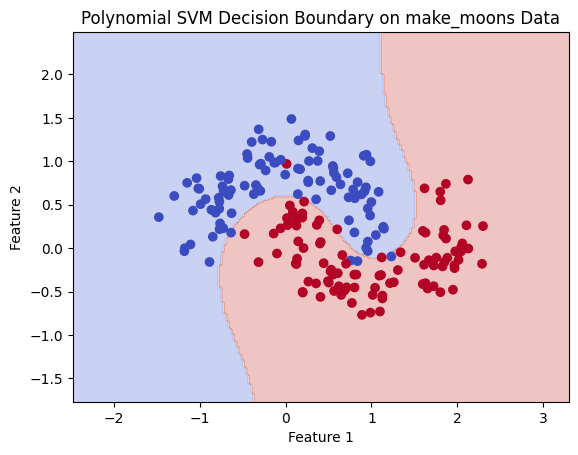

In [12]:
def plot_predictions(clf, X, y):
    # Define the grid limits based on your data
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create the meshgrid (the "canvas" of points)
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 200),
        np.linspace(x1_min, x1_max, 200)
    )
    
    # Predict the class for every point in the grid
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    
    # Plot the decision regions
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.coolwarm, alpha=0.3)
    
    # Plot the original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    
    # --- Formatting ---
    plt.title('Polynomial SVM Decision Boundary on make_moons Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Run the function to display the plot
plot_predictions(polynomial_svm_clf, X, y)